<a href="https://colab.research.google.com/github/danielamejiacastro/MLDS--Course/blob/main/Quiz_9_GeoPandas_(Opcional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

#**Quiz 9 : Visualización de mapas coropléticos con *GeoPandas***
---

Este es un quiz para practicar las habilidades adquiridas usando *GeoPandas*  para manipular datos geoespaciales y construir visualizaciones de datos. En esta actividad usted deberá recrear una visualización de datos de los departamentos de Colombia por población.


> **Nota:** Esta tarea va a ser calificada en la plataforma **[UNCode](https://juezun.github.io/)**. Para esto, en cada ejercicio se indicará si es calificable o no, también los lugares donde debe escribir su código sin modificar lo demás con un aproximado de cantidad de líneas a escribir. No se preocupe si su código toma más líneas, esto es simplemente un aproximado destinado a que pueda replantear su estrategia si el código está tomando más de las esperadas. No es un requisito estricto y soluciones más largas también son válidas. Al finalizar, para realizar el envío (*submission*), descargue el notebook como un archivo **`.ipynb`** y haga su entrega a través de la plataforma de aprendizaje.

Ejecute la siguiente celda para importar las librerías.

In [1]:
#TEST_CELL

# Instalamos GeoPandas.
!pip install -q geopandas==0.13.2

In [2]:
# Importar librerías.
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
#TEST_CELL
!python --version
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('GeoPandas', gpd.__version__)

Python 3.12.2
Pandas 2.2.1
Matplotlib 3.8.3
GeoPandas 0.13.2


Este material fue realizado con las siguientes versiones:

- Python 3.10.6
- Pandas 1.5.3
- Matplotlib 3.7.1
- GeoPandas 0.13.2


> **Nota:** es **OBLIGATORIO** usar los alias y convenciones de la celda anterior en su código. UNCode no tendrá en cuenta librerías que importe en otras celdas, y podrían afectar el tiempo de ejecución de los problemas. Estos son:
  *  **Pandas**: **`pd`**
  *  **Matplotlib Pyplot**: **`plt`**
  *  **GeoPandas**: **`gpd`**

## **0.  Leer el archivo de datos**
---
> **IMPORTANTE:**

  1. Por favor descargue el archivo con el conjunto de datos desde el siguiente enlace: **[departamentos.json](https://github.com/JuezUN/datasets/raw/master/departamentos.json)**.
  
  2. En el enlace, haga clic derecho y seleccione la opción **"Guardar como..."**.

  3. Cargue este archivo en su sistema de archivos de **Google Colaboratory**. Para hacer esto:
    
    * Haga clic donde aparece el icono del directorio en la parte izquierda de la ventana en *Google Colaboratory* (resaltado en azul en la siguiente imagen con el número 1).
    * Después, haga clic en el icono **"Subir"** (resaltado en azul en la siguiente imagen con el número 2).
    * Seleccione el archivo **`departamentos.json`** que previamente descargó y haga clic en **"Aceptar"**.

<img src = "https://drive.google.com/uc?export=view&id=13W59jfdOpAn_DYIjpXt4WPBZiU7BlRGY" alt = "Sistema archivos colab" width = "70%">  </img>

4. Ejecute la siguiente celda para cargar el conjunto de datos dentro del DataFrame de *pandas* llamado **`departamentos_gdf`**:

In [4]:
#TEST_CELL
#@markdown > **Nota**: De manera alternativa, ejecute esta celda para descargar el archivo directamente.

# Descargamos el archivo.
!wget -q https://github.com/JuezUN/datasets/raw/master/departamentos.json
!ls

'wget' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
### EJECUTAR ESTA CELDA SIN MODIFICARLA. SI FALLA, DEBE SEGUIR EL PROCEDIMIENTO DESCRITO ANTES.
departamentos_gdf = gpd.read_file('departamentos.json')

departamentos_gdf.head()

,nombre_dpto,region,area,perimetro,pob_cabecera,pob_resto,pob_total,geometry
0,ANTIOQUIA,Región Eje Cafetero - Antioquia,6.335186e+10,1963728.843,5281409,1396521,6677930,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,ATLÁNTICO,Región Caribe,3.360765e+09,240936.172,2282828,139300,2722128,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,BOGOTÁ,Región Centro Oriente,1.650948e+09,323322.540,7715778,28177,7743955,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."
3,BOLÍVAR,Región Caribe,2.614189e+10,1309427.968,1618648,562328,2180976,"POLYGON ((-75.15950 10.42360, -75.15430 10.409..."
4,BOYACÁ,Región Centro Oriente,2.335258e+10,1364539.911,736624,506107,1242731,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460..."


Este conjunto de datos cuenta con los siguientes datos por cada uno de los departamentos del país:

- **`geometry`**: como todo _GeoDataFrame_, nuestro conjunto de datos cuenta con la geometría del perímetro de cada departamento.
- **`area`, `perimetro`**: además de la geometría, el conjuinto de datos cuenta con datos del área (en $m^2$) y el perimetro (en $m$) de cada departamento.



> **Nota:** La información geométrica de los departamentos fue extraida y procesada del repositorio [_Geo Json map of Colombia_](https://gist.github.com/john-guerra/43c7656821069d00dcbc) del experto en visualización [_John Guerra_](https://johnguerra.co).

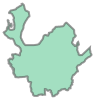

In [7]:
#TEST_CELL

# Pruebe cambiando el departamento por otro de los nombres válidos del conjunto.
# Recuerde  que el índice tiene que ser exacto o la ejecución fallara.

departamentos_gdf.loc[0, 'geometry']

- **`pob_total`, `pob_cabecera` y `pob_resto`**: este conjunto de datos viene con proyecciones oficiales de información poblacional de cada departamento, con una variable para la población de la **cabecera municipal** (**`pob_cabecera`**), del **resto municipal** (**`pob_resto`**) y la suma de ambos valores (**`pob_cabecera`**). Estos datos fueron obtenidos de proyecciones realizadas en el censo realizado por el **DANE** en el año 2018, y está disponible para su consulta en la siguiente [entrada](es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_población) de _Wikipedia_.

> **Nota:** No se preocupe por el archivo del dataset en ***UNCode***, el ambiente de calificación ya cuenta con este archivo para calificar sus ejercicios.

## **1. Departamentos de Colombia por población**
---

En este primer ejercicio deberá replicar el siguiente **mapa** de **departamentos** de Colombia por **población**, que está codificada por el tono de color.

Para esto, deberá utilizar el método **`.plot`** del objeto _GeoDataFrame_. Este mapa deberá cumplir los siguientes requisitos:


* Deberá **graficarse** en el objeto **`Axes`** de _Matplotlib_ dispuesto al inicio de la celda. Utilice el argumento **`ax`** del método **`.plot`**.
* La **leyenda** de la visualización deberá estar habilitada. En este caso se trata de una barra de color autogenerada.
* El objeto **`Axes`** deberá tener el siguiente **título** exacto:

  ```python
  'DEPARTAMENTOS DE COLOMBIA POR POBLACIÓN'
  ```
* El color codificará la población (variable continua) de cada departamento, identificado por la variable **`pob_total`**. Además de esto, deberá utilizar el siguiente _colormap_ exacto de _Matplotlib_:

  ```python
  cmap = 'gnuplot'
  ```



> **NOTA: Los comandos para graficar y modificar una figura deberían ir todos en la misma celda. Separarlos en celdas distintas puede causar que no se grafique nada.**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Ponga especial atención a los detalles. Elementos como los títulos de las gráficas no son generados por defecto y puede necesitar definirlos.
* El título de la gráfica deberá ser asignado directamente en el objeto **`Axes`** de _Matplotlib_.

    ```python
    ax.set_title('Título de la gráfica')
    ```
* El método **`.plot`** de los objetos **`GeoDataFrame`** recibe múltiples argumentos que le permiten definir detalles de la visualización.

  1. **`column`** - determina la variable respecto a la cual se codifica el color.
  2. **`cmap`** - determina el _colormap_ de _Matplotlib_ usado en la visualización.
  3. **`legend`** - recibe un _booleano_ que determina si se visualiza o no la leyenda. Por defecto **NO** se visualiza.

  
* Detalles como el **`dpi`** no son calificados, pero se recomienda no modificar para que la referencia de salida esperada corresponda y sea más fácil identificar las diferencias.

</p>

C:\Users\Daniela\AppData\Local\Temp\ipykernel_13972\82962614.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


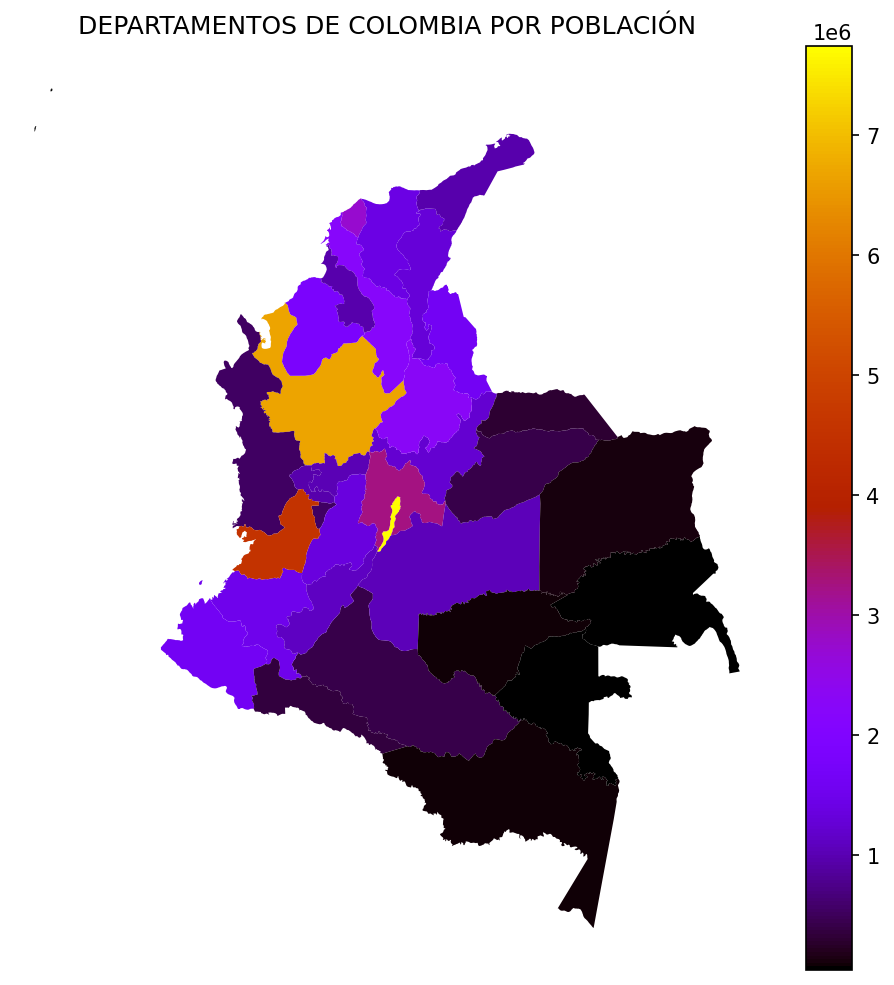

In [18]:
# VARIABLES CALIFICADAS: fig1, ax_pob
fig1, ax_pob = plt.subplots(1,                  # Solo un objeto Axes para la figura.
                               figsize=(8, 8), # Tamaño de la figura.
                               dpi=150)         # Puntos por pulgada de la imagen.

# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_pob.axis('off')
plt.axis('equal')


### ESCRIBA SU CÓDIGO AQUÍ ### (~ 13 líneas de código)

# Cargar el GeoDataFrame desde el archivo JSON
departamentos_gdf = gpd.read_file("departamentos.json")

# Graficar el mapa de departamentos por población
departamentos_gdf.plot(ax=ax_pob, column='pob_total', legend=True, cmap='gnuplot')
ax_pob.set_title('DEPARTAMENTOS DE COLOMBIA POR POBLACIÓN')

# Guardar la figura con fondo transparente
fig1.savefig("mapa_departamentos.png", transparent=True)
### FIN DEL CÓDIGO ###


fig1.show()

In [13]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN DE LA ACTIVIDAD
fig1.show()
plt.close()

C:\Users\Daniela\AppData\Local\Temp\ipykernel_13972\852563105.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


> **Salida esperada:**
***
<img src = "https://drive.google.com/uc?export=view&id=1zYEBYe325gKrjOxby0yqzB0IPiV5zdfn" alt = "Encabezado MLDS" width = "92%">  </img>


## **2. Mapa de regiones de Colombia**
---

En este segundo ejercicio deberá replicar el siguiente **mapa** de **regiones** de Colombia, donde cada departamento es coloreado por un color determinante de su región.






Para esto, deberá utilizar el método **`.plot`** del objeto _GeoDataFrame_. Este mapa deberá cumplir los siguientes requisitos:


* Deberá **graficarse** en el objeto **`Axes`** de _Matplotlib_ dispuesto al inicio de la celda. Utilice el argumento **`ax`** del método **`.plot`**.
* La **leyenda** de la visualización deberá estar habilitada.
* El objeto **`Axes`** deberá tener el siguiente **título** exacto:

  ```python
  'MAPA DE REGIONES DE COLOMBIA'
  ```
* El color codificará la región (variable discreta) de cada departamento, identificado por la variable **`region`**. Además de esto, deberá utilizar el siguiente _colormap_ exacto de _Matplotlib_:

  ```python
  cmap = 'Pastel1'
  ```

* Para una fidelidad completa en la representación, el método **`.plot`** deberá recibir los siguientes argumentos que definen el grosor de los mapas:

  ```python
  .plot(...                                   
        edgecolor='black',
        linewidth=0.7)
  ```





> **NOTA: Los comandos para graficar y modificar una figura deberían ir todos en la misma celda. Separarlos en celdas distintas puede causar que no se grafique nada.**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Ponga especial atención a los detalles. Elementos como los títulos de las gráficas no son generados por defecto y puede necesitar definirlos.
* El título de la gráfica deberá ser asignado directamente en el objeto **`Axes`** de _Matplotlib_.

    ```python
    ax.set_title('Título de la gráfica')
    ```
* El método **`.plot`** de los objetos **`GeoDataFrame`** recibe múltiples argumentos que le permiten definir detalles de la visualización.

  1. **`column`** - determina la variable respecto a la cual se codifica el color.
  2. **`cmap`** - determina el _colormap_ de _Matplotlib_ usado en la visualización.
  3. **`legend`** - recibe un _booleano_ que determina si se visualiza o no la leyenda. Por defecto **NO** se visualiza.
  4. **`edgecolor`** - determina el color del borde de las figuras geoespaciales dibujadas.
  4. **`linewidth`** - determina el grosor del borde de las figuras geoespaciales dibujadas.


* Detalles como el **`dpi`** no son calificados, pero se recomienda no modificar para que la referencia de salida esperada corresponda y sea más fácil identificar las diferencias.

</p>

C:\Users\Daniela\AppData\Local\Temp\ipykernel_13972\2879468028.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


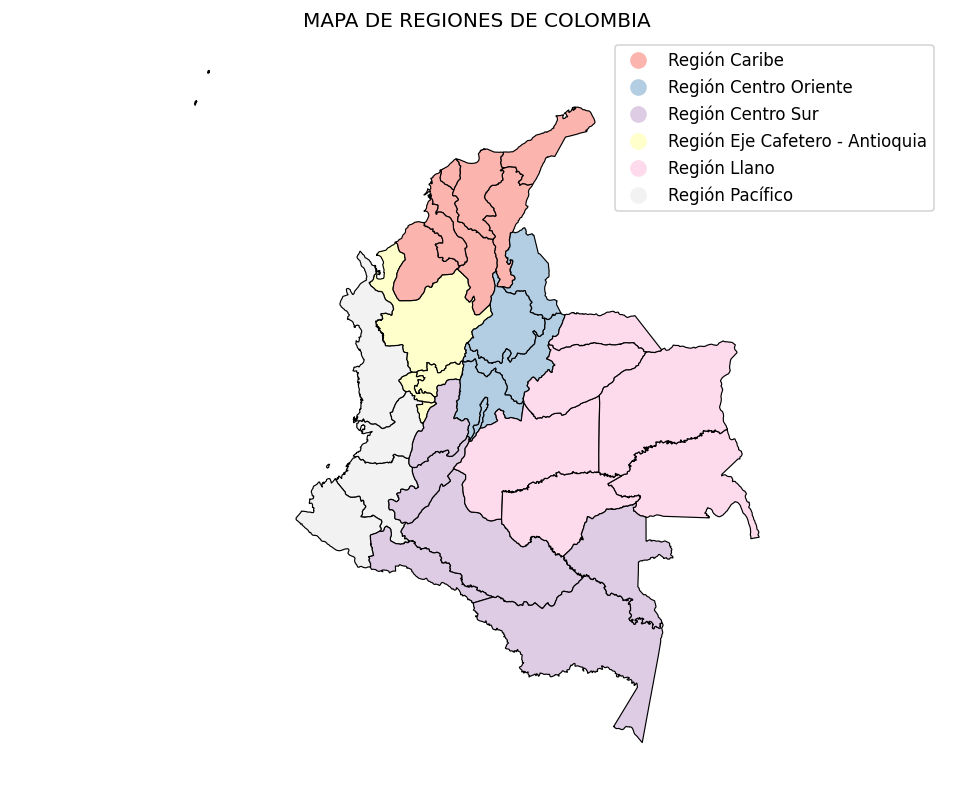

In [19]:
# VARIABLES CALIFICADAS: fig2, ax_region
fig2, ax_region = plt.subplots(1,               # Solo un objeto Axes para la figura.
                               figsize=(10, 8), # Tamaño de la figura.
                               dpi=120)         # Puntos por pulgada de la imagen.

# Preparamos la gráfica eliminando los bordes numéricos innecesarios.
ax_region.axis('off')
plt.axis('equal')


### ESCRIBA SU CÓDIGO AQUÍ ### (~ 13 líneas de código)

# Graficar el mapa de regiones de Colombia
departamentos_gdf.plot(ax=ax_region, column='region', legend=True, cmap='Pastel1',
                        edgecolor='black', linewidth=0.7)
ax_region.set_title('MAPA DE REGIONES DE COLOMBIA')





### FIN DEL CÓDIGO ###


fig2.show()

In [20]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN DE LA ACTIVIDAD
fig2.show()
plt.close()

C:\Users\Daniela\AppData\Local\Temp\ipykernel_13972\1012526613.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


> **Salida esperada:**
***
<img src = "https://drive.google.com/uc?export=view&id=1BXjH-A6A3fryxE35Wn3dHwB0t7QJvIOb" alt = "Encabezado MLDS" width = "100%">  </img>



**¡Felicitaciones!** Ha terminado el quiz. ¡Buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Ingrese a la plataforma de aprendizaje.
3. Realice el envío del *notebook* que descargó en la tarea (o quiz) correspondiente.
4. Recuerde que si tiene algún error, puede hacer múltiples intentos.

## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistente docente:** Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*
